In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import os

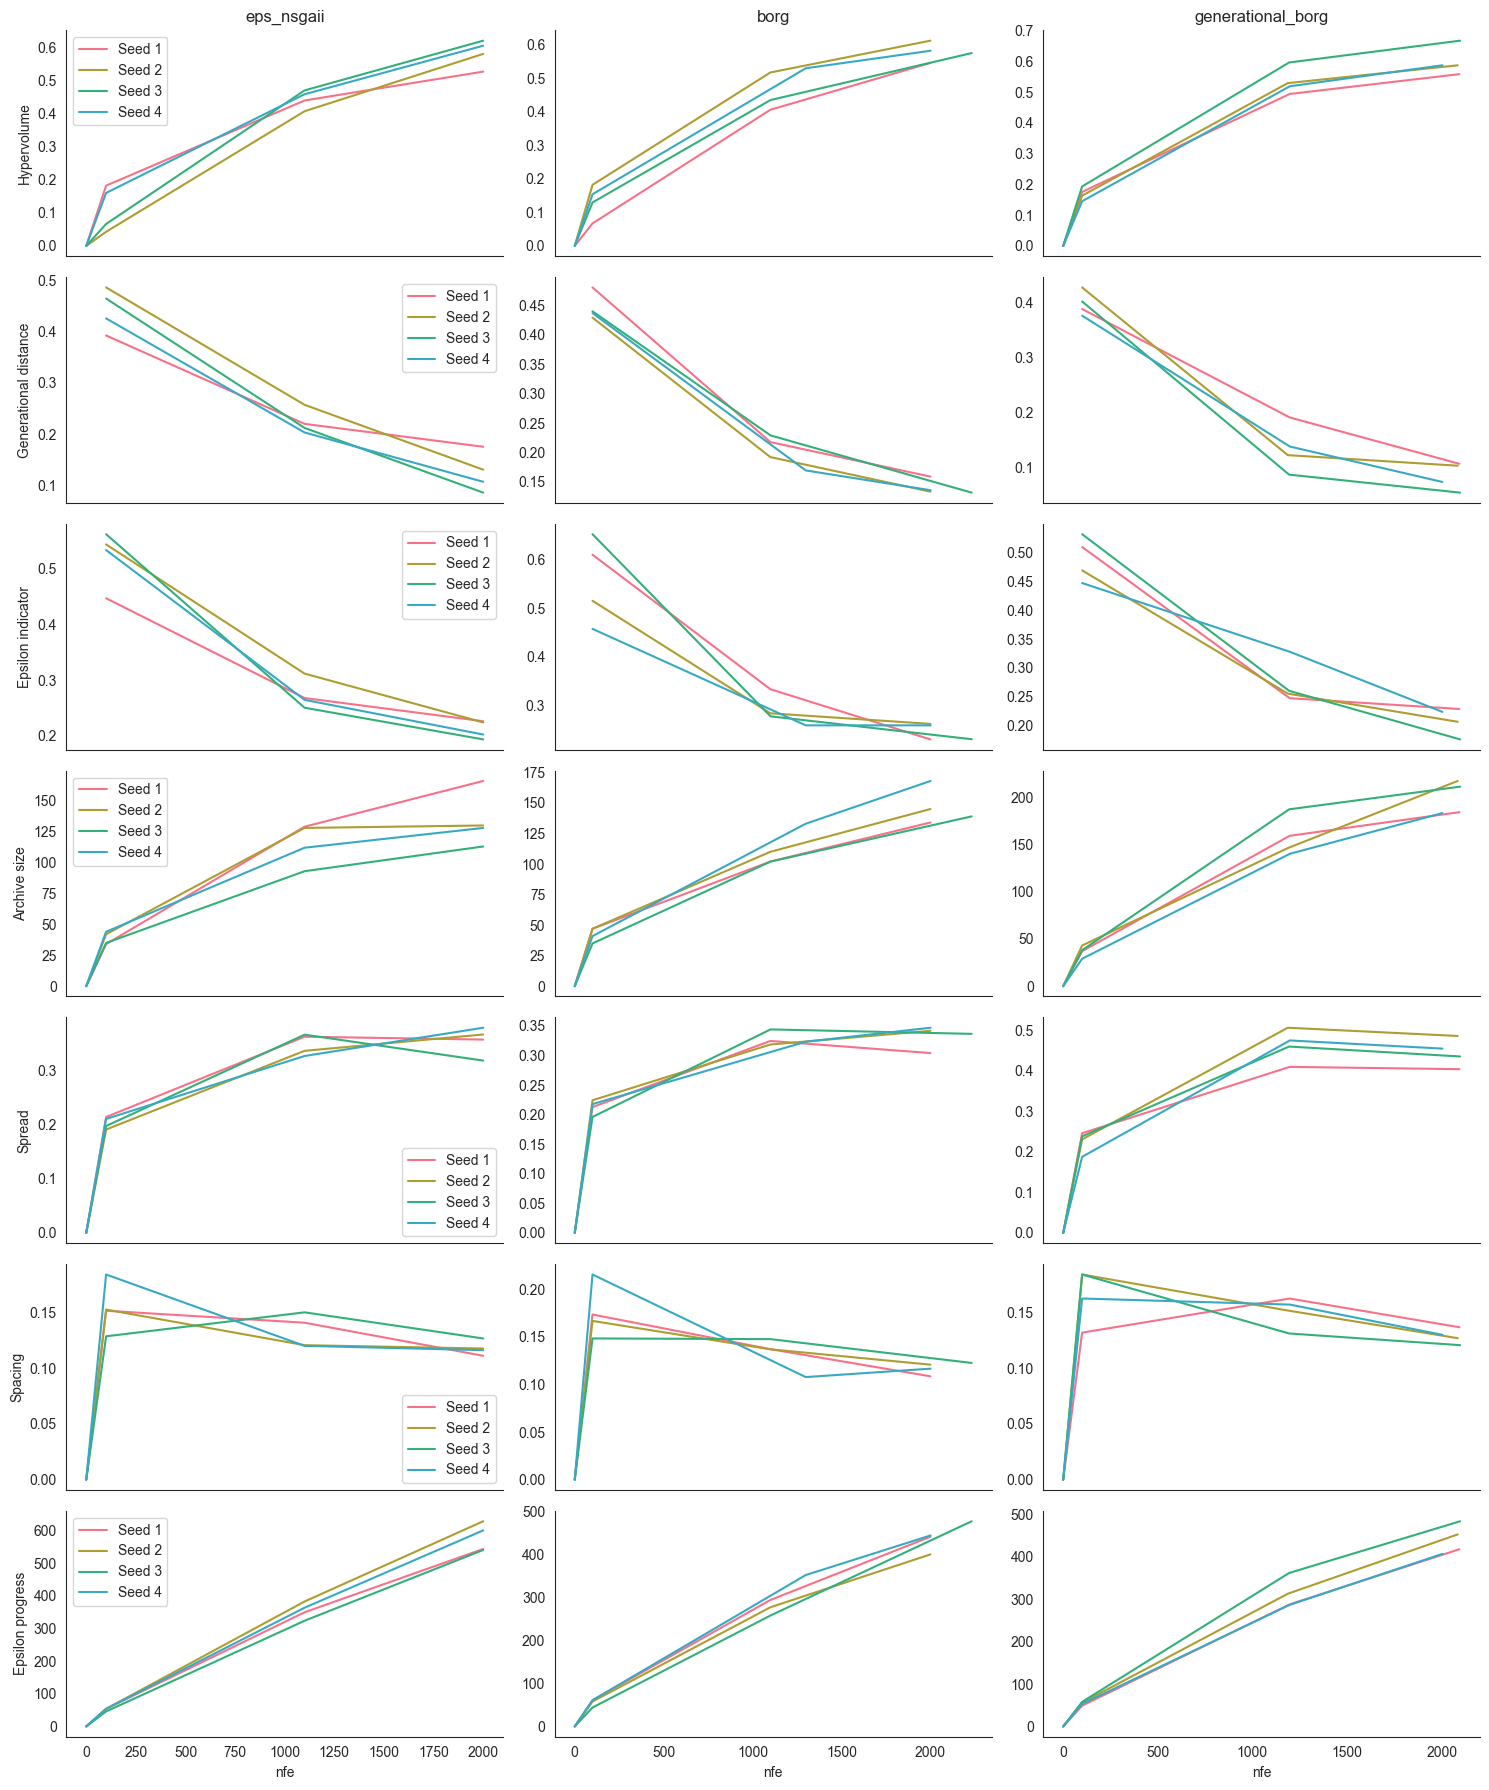

In [3]:
sns.set_style("white")

# Define the MOEAs and metrics
moeas = ['eps_nsgaii', 'borg', 'generational_borg']
metric_names = ['hypervolume', 'generational_distance', 'epsilon_indicator', 'archive_size', 'spread', 'spacing', 'epsilon_progress']

# Create a figure with subplots for each metric and MOEA
fig, axes = plt.subplots(nrows=len(metric_names), ncols=len(moeas), figsize=(15, 18), sharex='col')

# Problem name
problem_name = 'DTLZ2'

# Number of seeds
seeds = 5 

# Iterate over each MOEA
for col_idx, moea in enumerate(moeas):
    # Create a color palette with enough colors for each seed
    palette = sns.color_palette("husl", seeds)
    
    # Iterate over each metric
    for row_idx, metric_name in enumerate(metric_names):
        ax = axes[row_idx, col_idx]
        
        # Plot each seed's data
        for seed in range(seeds):
            # For epsilon_progress, load from convergence file
            if metric_name == 'epsilon_progress':
                convergence_file = os.path.join("./results", problem_name, moea, f"seed{seed}_convergence.csv")
                if os.path.exists(convergence_file):
                    convergence_df = pd.read_csv(convergence_file)
                    if 'epsilon_progress' in convergence_df.columns and 'nfe' in convergence_df.columns:
                        convergence_df = convergence_df.sort_values('nfe')
                        ax.plot(convergence_df['nfe'], convergence_df['epsilon_progress'], 
                                color=palette[seed], label=f'Seed {seed+1}' if col_idx == 0 else "")
            else:
                # Load the metrics data for this MOEA and seed
                metrics_file = os.path.join("./results", problem_name, moea, f"seed{seed}_metrics.csv")
                
                if os.path.exists(metrics_file):
                    metrics_df = pd.read_csv(metrics_file)
                    
                    # Sort by nfe to ensure proper plotting
                    metrics_df = metrics_df.sort_values('nfe')
                    
                    # Plot the metric over nfe
                    if metric_name in metrics_df.columns:
                        ax.plot(metrics_df['nfe'], metrics_df[metric_name], 
                                color=palette[seed], label=f'Seed {seed+1}' if col_idx == 0 else "")
        
        # Set y label only on the first column
        if col_idx == 0:
            ax.set_ylabel(metric_name.replace('_', ' ').capitalize())
        
        # Set title for each MOEA in the first row
        if row_idx == 0:
            ax.set_title(f'{moea}')

# Set the x label for the last row of subplots
for ax in axes[-1, :]:
    ax.set_xlabel("nfe")

# Add legends to the first subplot in each row
for ax in axes[:, 0]:
    ax.legend()

# Despine the figure
sns.despine(fig)

# Adjust layout to prevent overlap
plt.tight_layout()

# Create directory for figures if it doesn't exist
os.makedirs("./figures", exist_ok=True)

# Save the figure
plt.savefig(f'./figures/{problem_name}_convergence_metrics.png', dpi=300)

# Show the plot
plt.show()

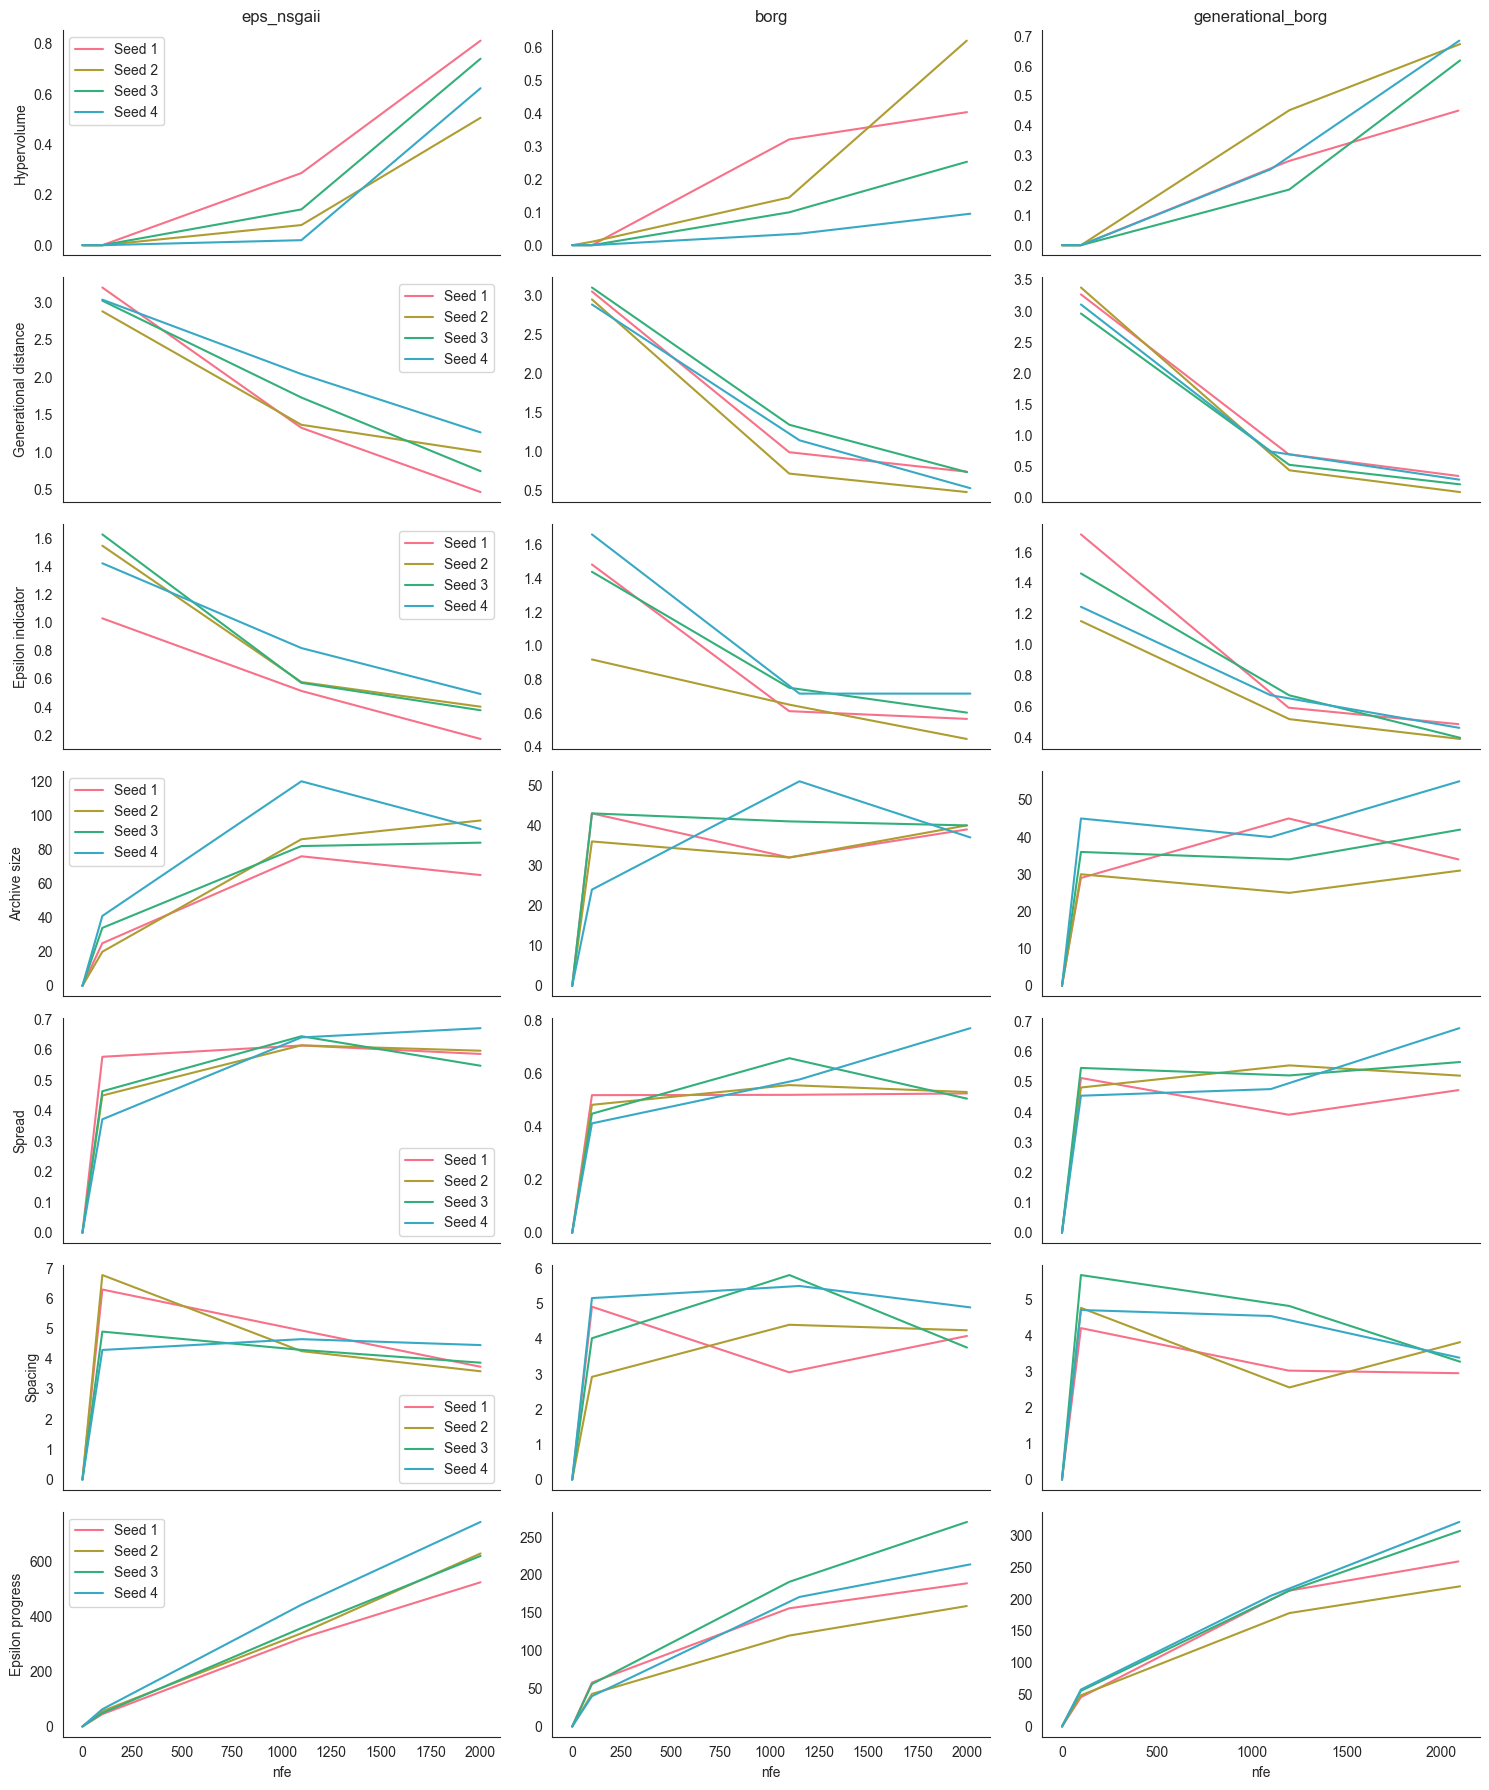

In [4]:
# Create a figure with subplots for each metric and MOEA
fig, axes = plt.subplots(nrows=len(metric_names), ncols=len(moeas), figsize=(15, 18), sharex='col')

# Problem name
problem_name = 'DTLZ3'

# Number of seeds
seeds = 5 

# Iterate over each MOEA
for col_idx, moea in enumerate(moeas):
    # Create a color palette with enough colors for each seed
    palette = sns.color_palette("husl", seeds)
    
    # Iterate over each metric
    for row_idx, metric_name in enumerate(metric_names):
        ax = axes[row_idx, col_idx]
        
        # Plot each seed's data
        for seed in range(seeds):
            # For epsilon_progress, load from convergence file
            if metric_name == 'epsilon_progress':
                convergence_file = os.path.join("./results", problem_name, moea, f"seed{seed}_convergence.csv")
                if os.path.exists(convergence_file):
                    convergence_df = pd.read_csv(convergence_file)
                    if 'epsilon_progress' in convergence_df.columns and 'nfe' in convergence_df.columns:
                        convergence_df = convergence_df.sort_values('nfe')
                        ax.plot(convergence_df['nfe'], convergence_df['epsilon_progress'], 
                                color=palette[seed], label=f'Seed {seed+1}' if col_idx == 0 else "")
            else:
                # Load the metrics data for this MOEA and seed
                metrics_file = os.path.join("./results", problem_name, moea, f"seed{seed}_metrics.csv")
                
                if os.path.exists(metrics_file):
                    metrics_df = pd.read_csv(metrics_file)
                    
                    # Sort by nfe to ensure proper plotting
                    metrics_df = metrics_df.sort_values('nfe')
                    
                    # Plot the metric over nfe
                    if metric_name in metrics_df.columns:
                        ax.plot(metrics_df['nfe'], metrics_df[metric_name], 
                                color=palette[seed], label=f'Seed {seed+1}' if col_idx == 0 else "")
        
        # Set y label only on the first column
        if col_idx == 0:
            ax.set_ylabel(metric_name.replace('_', ' ').capitalize())
        
        # Set title for each MOEA in the first row
        if row_idx == 0:
            ax.set_title(f'{moea}')

# Set the x label for the last row of subplots
for ax in axes[-1, :]:
    ax.set_xlabel("nfe")

# Add legends to the first subplot in each row
for ax in axes[:, 0]:
    ax.legend()

# Despine the figure
sns.despine(fig)

# Adjust layout to prevent overlap
plt.tight_layout()

# Create directory for figures if it doesn't exist
os.makedirs("./figures", exist_ok=True)

# Save the figure
plt.savefig(f'./figures/{problem_name}_convergence_metrics.png', dpi=300)

# Show the plot
plt.show()